# Project : Titanic - Machine Learning from Disaster

By : Puchong Saribut

Dataset from Kaggle : https://www.kaggle.com/competitions/titanic/data

In [30]:
#import modules
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
#import data
train_df = pd.read_csv('C:/Users/User/Downloads/titanic/train.csv', index_col= 'PassengerId')
test_df = pd.read_csv('C:/Users/User/Downloads/titanic/test.csv', index_col= 'PassengerId')

In [32]:
#Check available features
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [33]:
#inspect data quality, missing values, and type
train_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non

In [34]:
train_df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [35]:
test_df.isna().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [36]:
#fill na using average age grouped by sex and pclass
def age_na(df, condition_from):
    condition_df = condition_from.groupby(['Sex', 'Pclass'])['Age'].mean()
    for pclass in range(1,4):
        df.loc[(df['Sex'] == 'female')&(df['Pclass'] == pclass),'Age'] = \
            df.loc[(df['Sex'] == 'female')&(df['Pclass'] == pclass),'Age'].fillna(condition_df.loc[('female',pclass)])
        df.loc[(df['Sex'] == 'male')&(df['Pclass'] == pclass),'Age'] = \
            df.loc[(df['Sex'] == 'male')&(df['Pclass'] == pclass),'Age'].fillna(condition_df.loc[('male',pclass)])
    return df

In [37]:
#drop some features
train_df = train_df.drop(['Name', 'Cabin', 'Ticket'], axis=1)
test_df = test_df.drop(['Name', 'Cabin', 'Ticket'], axis=1)

In [38]:
train_df = age_na(train_df, train_df)
test_df = age_na(test_df, train_df)

In [39]:
train_df[train_df['Age'] <= 1]
#Baby under 1 year old with many siblings, not survived
#Sibsp is an useful feature.

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
79,1,2,male,0.83,0,2,29.0000,S
165,0,3,male,1.00,4,1,39.6875,S
173,1,3,female,1.00,1,1,11.1333,S
184,1,2,male,1.00,2,1,39.0000,S
306,1,1,male,0.92,1,2,151.5500,S
382,1,3,female,1.00,0,2,15.7417,C
387,0,3,male,1.00,5,2,46.9000,S
470,1,3,female,0.75,2,1,19.2583,C
645,1,3,female,0.75,2,1,19.2583,C


In [40]:
train_df.groupby(['Pclass', 'Sex', 'Embarked'])['Fare'].mean()

Pclass  Sex     Embarked
1       female  C           115.640309
                Q            90.000000
                S            99.026910
        male    C            93.536707
                Q            90.000000
                S            52.949947
2       female  C            25.268457
                Q            12.350000
                S            21.912687
        male    C            25.421250
                Q            12.350000
                S            19.232474
3       female  C            14.694926
                Q            10.307833
                S            18.670077
        male    C             9.352237
                Q            11.924251
                S            13.307149
Name: Fare, dtype: float64

In [41]:
train_df[train_df['Embarked'].isna()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
62,1,1,female,38.0,0,0,80.0,NaN
830,1,1,female,62.0,0,0,80.0,NaN


In [42]:
#Compare missing values with group statistics, female with fare 80 should be 'Q'.
train_df['Embarked'] = train_df['Embarked'].fillna('Q')

In [43]:
test_df[test_df['Fare'].isna()]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1044,3,male,60.5,0,0,NaN,S


In [44]:
#Use data from train_df, no data leakage
test_df['Fare'] = test_df['Fare'].fillna(13.307149)

In [45]:
print(train_df.info())
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 

In [46]:
#Convert data type
for col in ['Sex', 'Embarked', 'Survived']:
    train_df[col] = train_df[col].astype('category')
train_df['Pclass'] = pd.Categorical(train_df['Pclass'])

for col in ['Sex', 'Embarked']:
    test_df[col] = test_df[col].astype('category')
test_df['Pclass'] = pd.Categorical(test_df['Pclass'])

In [47]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [48]:
lb_sex = LabelEncoder()
lb_embarked = LabelEncoder()

In [49]:
#Encode categorial data
train_df['Sex'] = lb_sex.fit_transform(train_df['Sex'])
test_df['Sex'] = lb_sex.transform(test_df['Sex'])

train_df['Embarked'] = lb_embarked.fit_transform(train_df['Embarked'])
test_df['Embarked'] = lb_embarked.transform(test_df['Embarked'])

In [50]:
#Prepare X and y
X = train_df.drop('Survived', axis = 1)
y = train_df['Survived']

In [51]:
#Split data for train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

In [52]:
dtree = DecisionTreeClassifier(max_features=1.0, max_depth = 5, random_state = 5)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_features=1.0, random_state=5)

In [53]:
y_pred = dtree.predict(X_test)
print("The decision tree model accuracy is {:.3f}".format(accuracy_score(y_test, y_pred)))


The decision tree model accuracy is 0.810


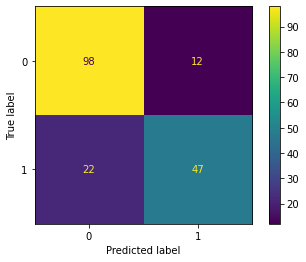

In [54]:
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm)
cmd.plot()

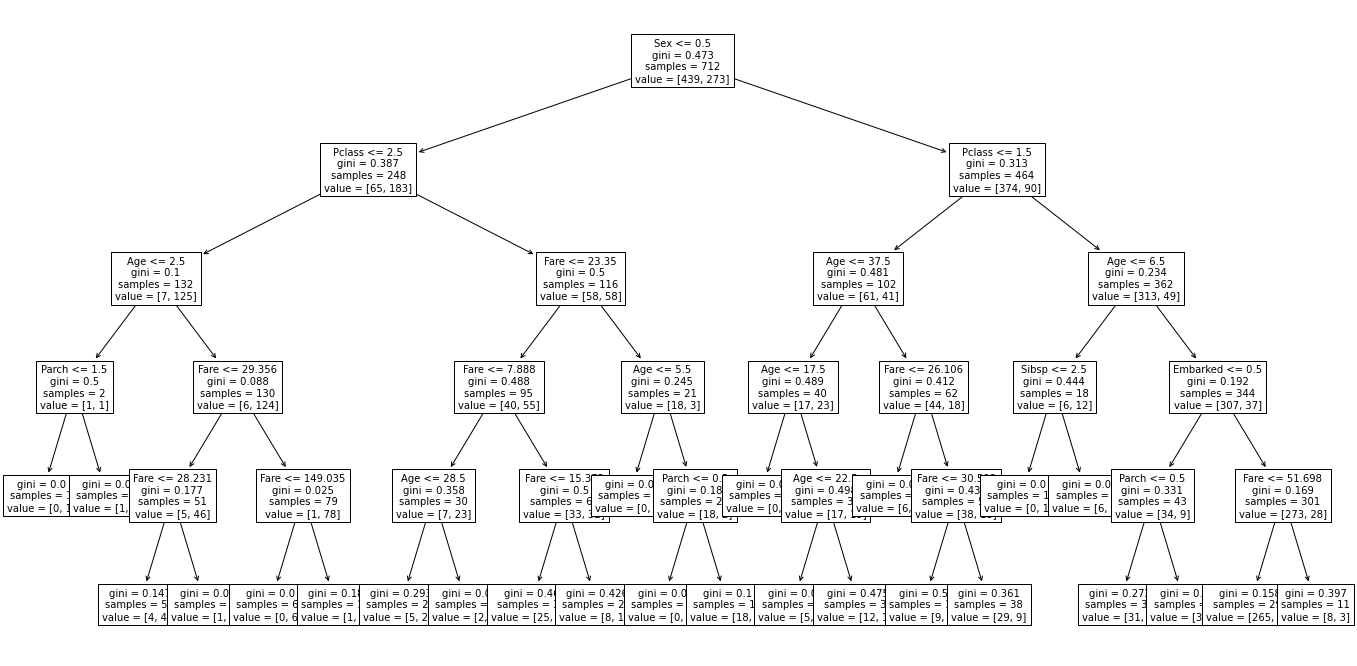

In [55]:
plt.figure(figsize=(24,12))  # set plot size (denoted in inches)
tree.plot_tree(dtree, feature_names = ['Pclass', 'Sex', 'Age','Sibsp', 'Parch','Fare', 'Embarked'], fontsize=10, max_depth = 5)
plt.show()

In [56]:
y_final = dtree.predict(test_df) #change model

result = pd.DataFrame({'PassengerID': test_df.index, 'Survived':y_final}) #change y_pred
result.set_index('PassengerID', inplace = True)

result.to_csv('C:/Users/User/Downloads/submission.csv')

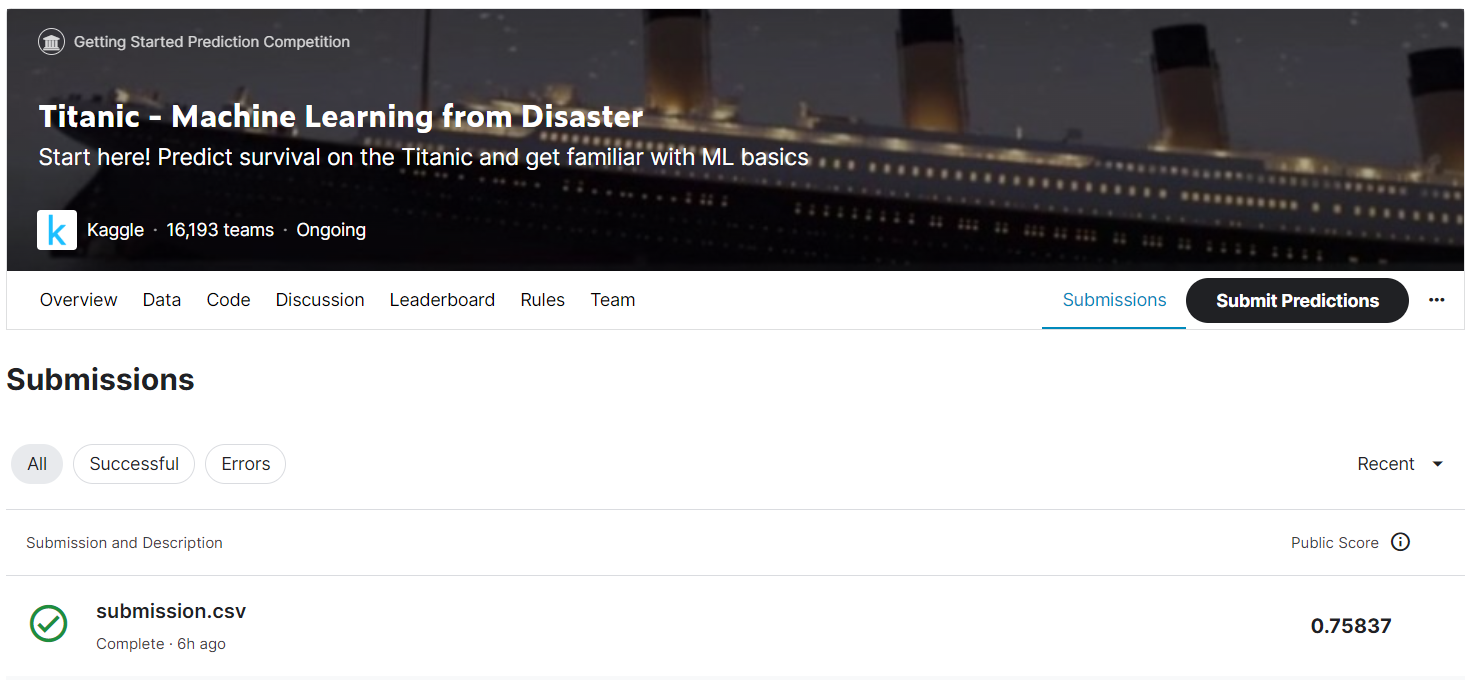

## Random Forest Classifier Model

In [57]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100, max_depth = 5, random_state = 1)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
print("The random forest model accuracy is {:.3f}".format(accuracy_score(y_test, y_pred_rf)))

The random forest model accuracy is 0.844


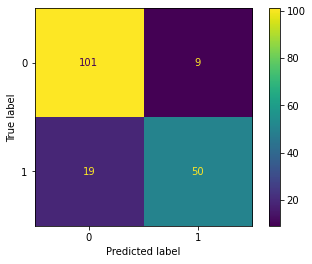

In [58]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
cmd_rf = ConfusionMatrixDisplay(cm_rf)
cmd_rf.plot()

In [59]:
y_pred_rf = rf.predict(test_df) #change model

result_rf = pd.DataFrame({'PassengerID': test_df.index, 'Survived':y_pred_rf}) #change y_pred
result_rf.set_index('PassengerID', inplace = True)

result_rf.to_csv('C:/Users/User/Downloads/submission_rf.csv')

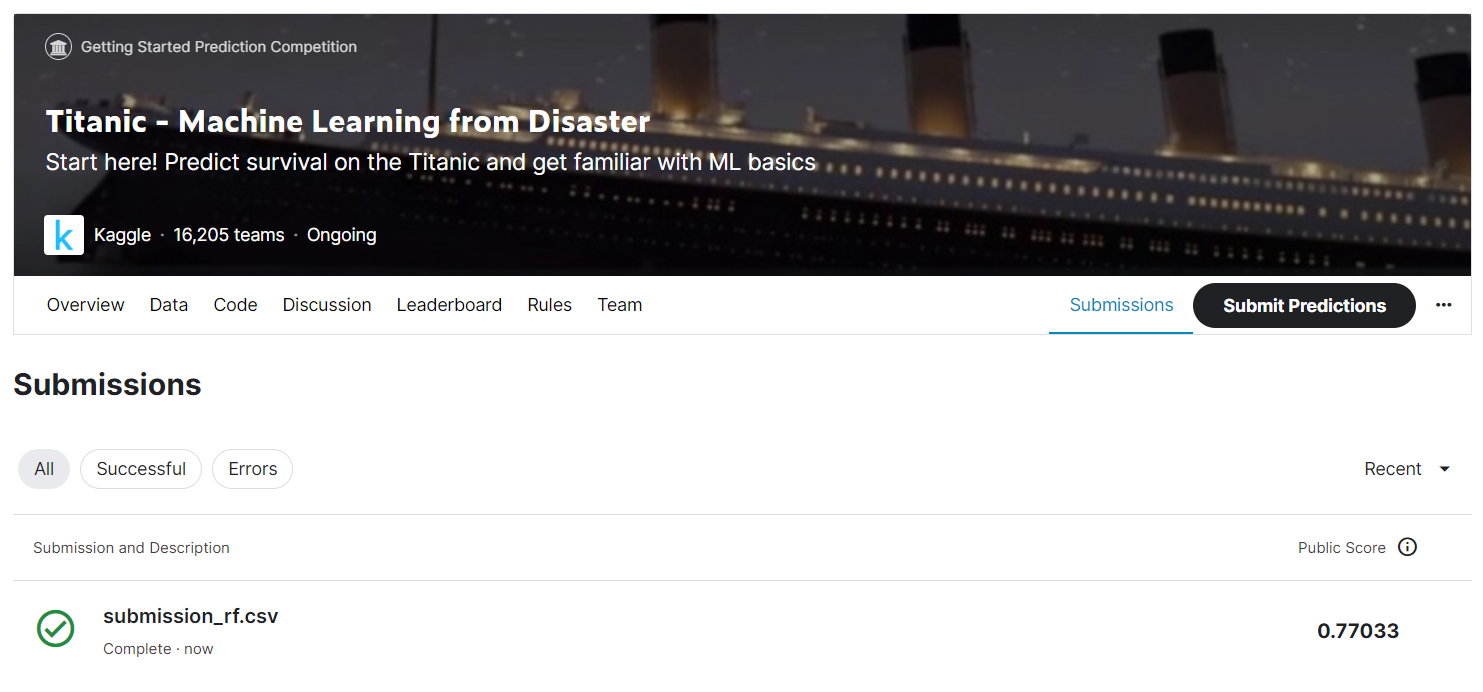